# LEVEL 5 TASK - EMPLOYEE SALARIES FOR DIFFERENT JOB ROLES

This dataset provides valuable insights into the compensation and job roles of employees across various industries and regions. Whether you're an HR analyst, data scientist, or someone interested in understanding salary trends, this dataset offers a wealth of information to explore and analyze.

Dataset:

     work_year: The year of employment.
     experience_level: The experience level of the employee (e.g., entry-level, mid-level, senior).
     employment_type: The type of employment (e.g., full-time, part-time, contract).
     job_title: The job title or position of the employee within the company.
     salary: The salary amount in the local currency.
     salary_currency: The currency in which the salary is denoted.
     salary_in_usd: The equivalent salary amount in USD (United States Dollars).
     employee_residence: The location of the employee's residence.
     remote_ratio: The percentage of remote work allowed for the position.
     company_location: The location of the company.
     company_size: The size of the company (e.g., small, medium, large).
   

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.express as px
from category_encoders import OneHotEncoder


##### Importing and Cleaning Data

In [2]:
df=pd.read_csv("ds_salaries.csv")#import csv files into a dataframe

In [3]:
df.info()#information regarding the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
df.shape

(607, 12)

In [5]:
df.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [6]:
df.head()#first 5 rows

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
df.describe().T#Summary statistics of numerical columns.

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [8]:
null_values = df.isnull().sum() # Check whether any null values are there in the dataset
null_values

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There is no missing values in the dataset and we got the cleaned data

In [9]:
df.duplicated().sum()

0

There are no duplicate values

#### Identify the outliers 

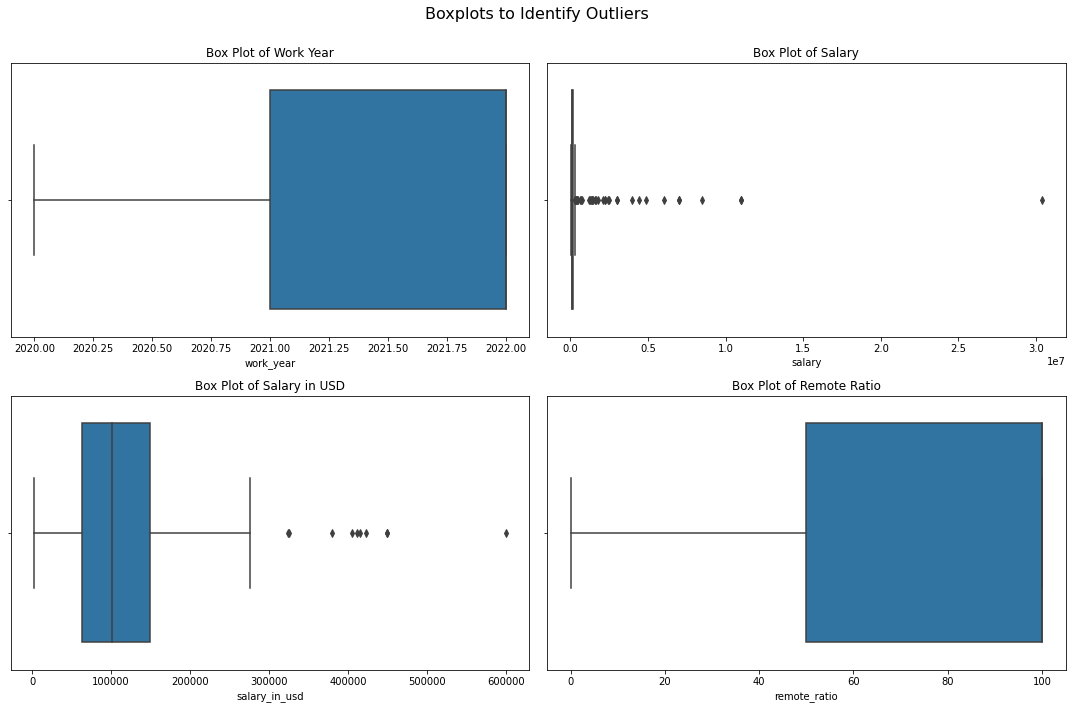

In [10]:
num_val=['work_year','salary','salary_in_usd','remote_ratio']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Boxplots to Identify Outliers\n', fontsize=16)

sns.boxplot(x=df['work_year'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Work Year')

sns.boxplot(x=df['salary'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Salary')

sns.boxplot(x=df['salary_in_usd'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Salary in USD')

sns.boxplot(x=df['remote_ratio'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Remote Ratio')

plt.tight_layout()
plt.show()

There are some outliers in the salary and salary_in_usd column

#### Remove Outliers

In [11]:
Q1 = df[num_val].quantile(0.25)
Q1

work_year         2021.0
salary           70000.0
salary_in_usd    62726.0
remote_ratio        50.0
Name: 0.25, dtype: float64

In [12]:
Q3 = df[num_val].quantile(0.75)
Q3

work_year          2022.0
salary           165000.0
salary_in_usd    150000.0
remote_ratio        100.0
Name: 0.75, dtype: float64

In [13]:
IQR = Q3 - Q1
IQR  # Interquartile Range

work_year            1.0
salary           95000.0
salary_in_usd    87274.0
remote_ratio        50.0
dtype: float64

In [62]:
df_no_outliers = df[~((df[num_val] < (Q1 - 1.5 * IQR)) | (df[num_val] > (Q3 + 1.5 * IQR))).any(axis=1)]
df=df_no_outliers

The dataset is free from outliers and is ready for Visualization 

### Employee Distribution based on Experience Level

In [15]:
types_dict={'EN':'Entry','MI':'Mid','SE':'Senior','EX':'Experienced'}
df['experience_level'] = df['experience_level'].map(types_dict)

In [16]:
df.experience_level.value_counts()

Senior         271
Mid            194
Entry           77
Experienced     21
Name: experience_level, dtype: int64

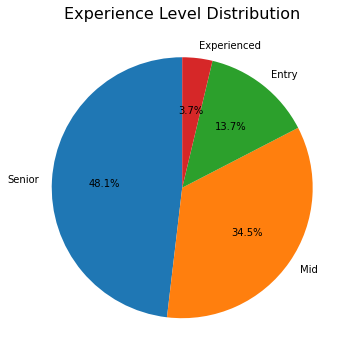

In [63]:
plt.figure(figsize=(6, 6))
exp_count = df['experience_level'].value_counts()
plt.pie(exp_count, labels=exp_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Experience Level Distribution',fontsize=16)
plt.show()

### Employee Distribution based on Employment Type

In [18]:
types_dict={'FT':'Full Time','PT':'Part time','CT':'Contract','FL':'Freelancer'}
df['employment_type'] = df['employment_type'].map(types_dict)

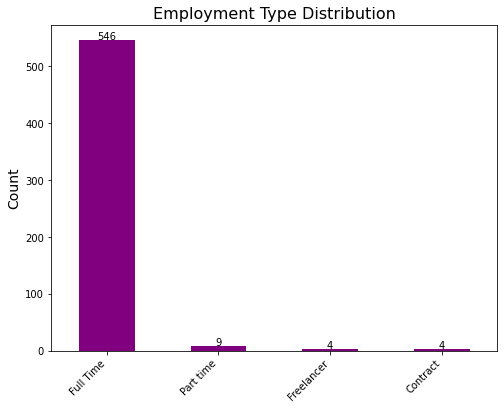

In [19]:
plt.figure(figsize=(8, 6))

emp_type_count = df['employment_type'].value_counts()
ax=emp_type_count.plot(kind='bar', color='purple')
plt.ylabel('Count', fontsize=14 )
plt.title('Employment Type Distribution', fontsize=16)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(emp_type_count):
    ax.text(i, v + 1, str(v), color='black', ha='center')
plt.show()


Out of 607 employees, 588 employees are full time workers.

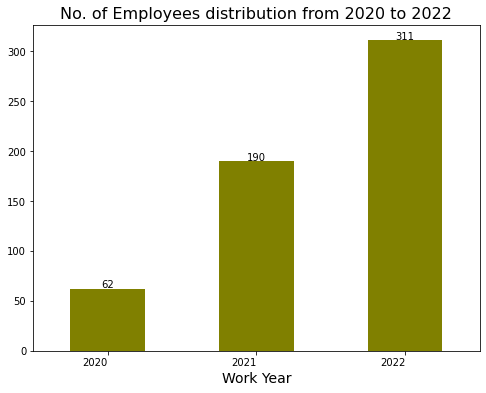

In [20]:
plt.figure(figsize=(8, 6))
work_year_count = df['work_year'].value_counts().sort_values(ascending=True)
ax = work_year_count.plot(kind='bar', color='olive')
plt.xlabel('Work Year', fontsize=14)
plt.title('No. of Employees distribution from 2020 to 2022',fontsize=16)
plt.xticks(rotation=0,ha='right')
for i, v in enumerate(work_year_count):
    ax.text(i, v + 1, str(v), color='black', ha='center')
plt.show()


In [21]:
avg_salary_USD_exp = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
avg_salary_USD_exp

,experience_level,salary_in_usd
0,Entry,67562.649351
1,Experienced,163816.857143
2,Mid,87406.994845
3,Senior,137647.214022


In [22]:
avg_salary_USD_emp = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()
avg_salary_USD_emp

,employment_type,salary_in_usd
0,Contract,126718.750000
1,Freelancer,48000.000000
2,Full Time,113329.045788
3,Part time,36144.000000


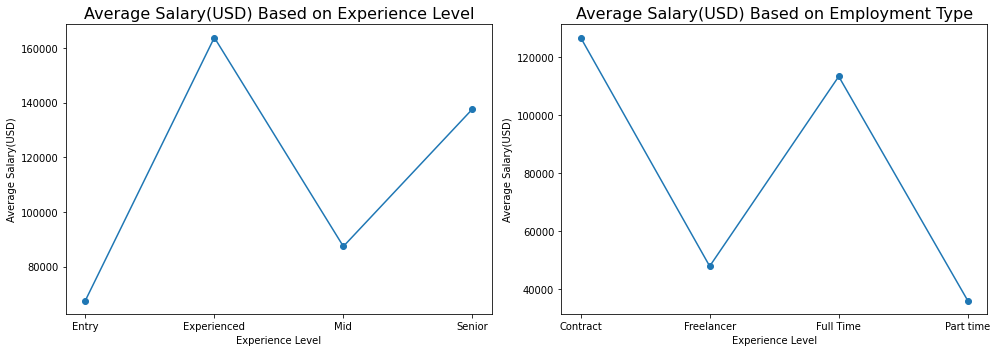

In [23]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(avg_salary_USD_exp['experience_level'], avg_salary_USD_exp['salary_in_usd'], marker='o', linestyle='-')
plt.title('Average Salary(USD) Based on Experience Level',fontsize=16)
plt.xlabel('Experience Level')
plt.ylabel('Average Salary(USD)')
plt.xticks(rotation=0)
plt.grid(False)

plt.subplot(1, 2, 2)
plt.plot(avg_salary_USD_emp['employment_type'], avg_salary_USD_emp['salary_in_usd'], marker='o', linestyle='-')
plt.title('Average Salary(USD) Based on Employment Type',fontsize=16)
plt.xlabel('Experience Level')
plt.ylabel('Average Salary(USD)')
plt.xticks(rotation=0)
plt.grid(False)

plt.tight_layout()
plt.show()

In [24]:
avg_salary_USD_job_title = df.groupby('job_title')['salary_in_usd'].mean().reset_index()
Top_20_Job_Titles=avg_salary_USD_job_title.sort_values(by='salary_in_usd',ascending=False).head(20)

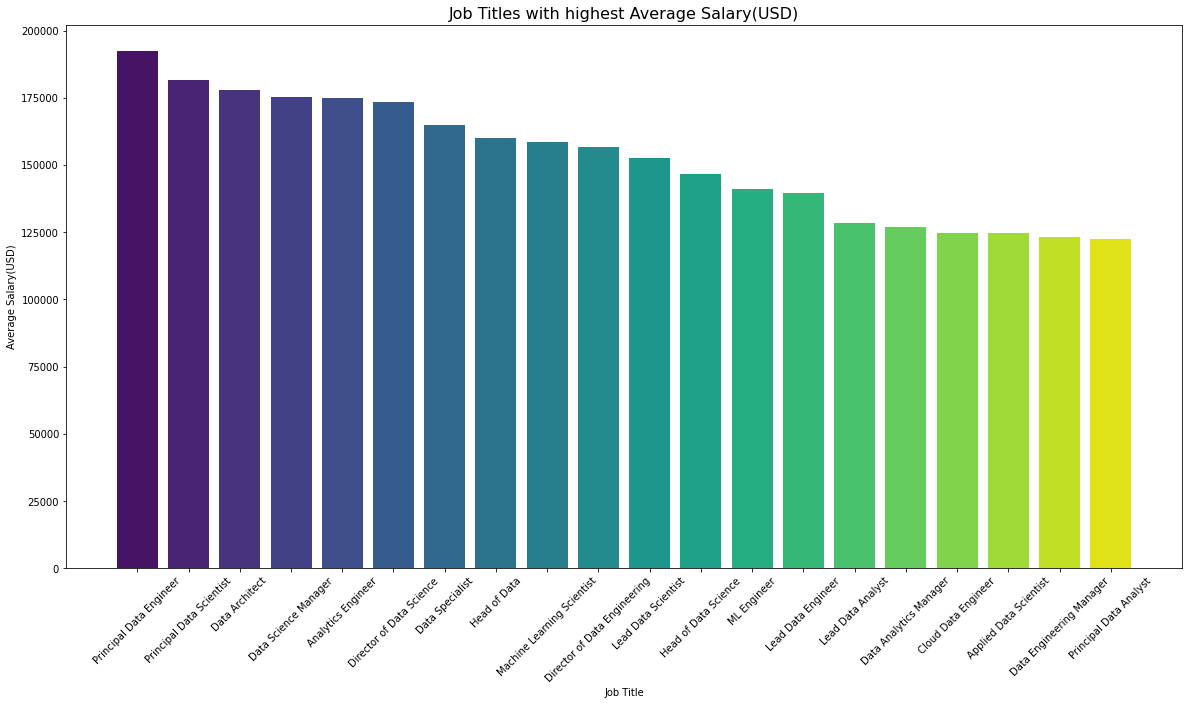

In [25]:
plt.figure(figsize=(20, 10))
color_palette = sns.color_palette("viridis", len(Top_20_Job_Titles))
plt.bar(Top_20_Job_Titles['job_title'], Top_20_Job_Titles['salary_in_usd'], color=color_palette)
plt.title('Job Titles with highest Average Salary(USD)',fontsize=16)
plt.xlabel('Job Title')
plt.ylabel('Average Salary(USD)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

In [26]:
Bottom_20_Job_Titles=avg_salary_USD_job_title.sort_values(by='salary_in_usd',ascending=True).head(10)

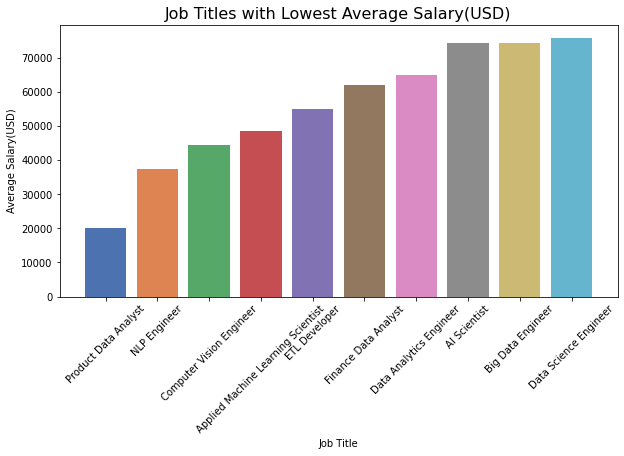

In [27]:
plt.figure(figsize=(10, 5))
color_palette = sns.color_palette("deep", len(Top_20_Job_Titles))
plt.bar(Bottom_20_Job_Titles['job_title'], Bottom_20_Job_Titles['salary_in_usd'], color=color_palette)
plt.title('Job Titles with Lowest Average Salary(USD)',fontsize=16)
plt.xlabel('Job Title')
plt.ylabel('Average Salary(USD)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

In [28]:
avg_salary_USD_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
avg_salary_USD_comp = df.groupby('company_size')['salary_in_usd'].mean().reset_index()
avg_salary_USD_remote = df.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()

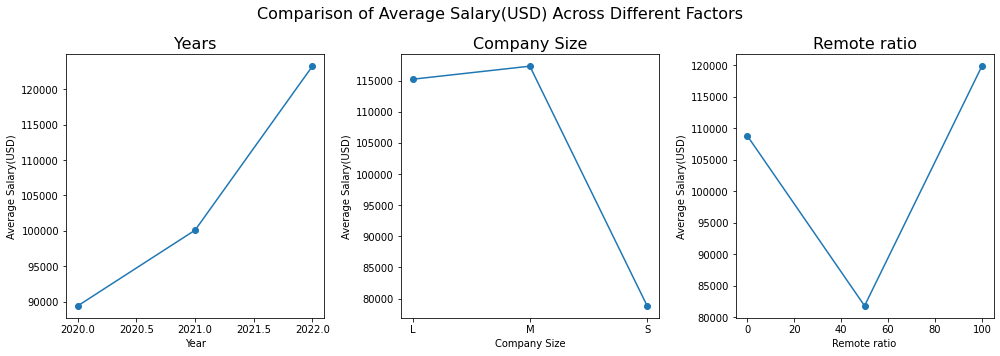

In [29]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.plot(avg_salary_USD_year['work_year'], avg_salary_USD_year['salary_in_usd'], marker='o', linestyle='-')
plt.title('Years',fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Salary(USD)')
plt.xticks(rotation=0)
plt.grid(False)

plt.subplot(1, 3, 2)
plt.plot(avg_salary_USD_comp['company_size'], avg_salary_USD_comp['salary_in_usd'], marker='o', linestyle='-')
plt.title('Company Size',fontsize=16)
plt.xlabel('Company Size')
plt.ylabel('Average Salary(USD)')
plt.xticks(rotation=0)
plt.grid(False)

plt.subplot(1, 3, 3)
plt.plot(avg_salary_USD_remote['remote_ratio'], avg_salary_USD_remote['salary_in_usd'], marker='o', linestyle='-')
plt.title('Remote ratio',fontsize=16)
plt.xlabel('Remote ratio')
plt.ylabel('Average Salary(USD)')
plt.xticks(rotation=0)
plt.grid(False)

plt.suptitle('Comparison of Average Salary(USD) Across Different Factors', fontsize=16)

plt.tight_layout()
plt.show()

In [30]:
correlation_matrix = df.corr()
correlation_matrix 

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
Unnamed: 0,1.000000,0.881402,0.177311,0.202408,0.073046
work_year,0.881402,1.000000,0.183321,0.227591,0.052354
salary,0.177311,0.183321,1.000000,0.902034,0.114520
salary_in_usd,0.202408,0.227591,0.902034,1.000000,0.125079
remote_ratio,0.073046,0.052354,0.114520,0.125079,1.000000


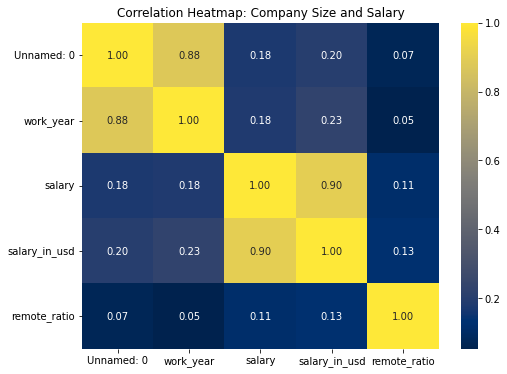

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f")
plt.title('Correlation Heatmap: Company Size and Salary')
plt.show()

### Model the Data

In [32]:
df_encoded= pd.get_dummies(df, columns=['experience_level', 'employment_type', 'employee_residence', 'company_location', 'company_size', 'job_title'], drop_first=True)

In [45]:
X= df_encoded.drop(columns=['salary_in_usd'])
y = df_encoded['salary_in_usd'] # Create Target Vector

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the data into training and testing set

In [47]:
ohe=OneHotEncoder(use_cat_names=True)# Instantiate OneHotEncoder
# OneHotEncoder is used to convert non-numerical data into numerical data

In [48]:
ohe.fit(X_train)
X_train_encoded = ohe.transform(X_train)
X_test_encoded = ohe.transform(X_test)
# Fit and Transform the feature Matrix

In [49]:
model = LinearRegression() # Instantiate Linear Regression

In [50]:
model.fit(X_train_encoded, y_train)

LinearRegression()

In [51]:
y_pred_baseline = [y_test.mean()] * len(y_test)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
print("Baseline MAE:", mae_baseline)

Baseline MAE: 43829.12350223197


In [52]:
y_pred_training = model.predict(X_train_encoded)
y_pred_training[:5]

array([ 62657.44018146,  63072.07771871,  82942.4135803 ,  87000.00000272,
       109959.26378919])

In [53]:
y_pred_testing = model.predict(X_test_encoded)
y_pred_testing[:5]

array([110771.49772018,  58722.59289807, 100530.48801571,  63687.86493508,
       150436.60692522])

In [54]:
mae_training = mean_absolute_error(y_train,y_pred_training)
mae_testing = mean_absolute_error(y_test,y_pred_testing)
print("Training MAE:",mae_training)
print("Testing MAE:",mae_testing)

r2_testing = r2_score(y_test, y_pred_testing)
r2_training = r2_score(y_train, y_pred_training)
print("\nr2_training :",r2_training)
print("r2_testing :",r2_testing)

mse_training = mean_squared_error(y_train, y_pred_training)
mse_testing = mean_squared_error(y_test, y_pred_testing)
print("\nTraining MSE:",mse_training)
print("Testing MSE:",mse_testing)

Training MAE: 2446.460996835386
Testing MAE: 5572.17348374666

r2_training : 0.989439588192758
r2_testing : 0.9458748627754182

Training MSE: 34408747.9880584
Testing MSE: 167486195.18888745


The model appears to perform well on both the training and testing sets.

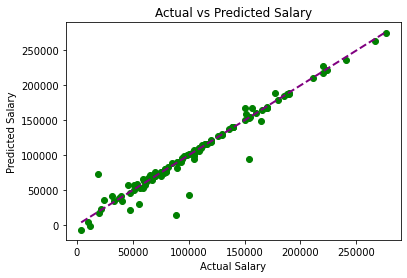

In [61]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_testing, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='purple', linestyle='--', lw=2)

plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()
